In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import metrics
from sklearn import datasets
import seaborn as sn

import tensorflow as tf
from tensorflow import keras

digits = datasets.load_digits()

In [2]:
digits.data.shape

(1797, 64)

# Dataset exploration:

In [3]:
print(digits.keys(), '\n')

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']) 



In [4]:
print('digits target names are:', '\n', digits.target_names)

digits target names are: 
 [0 1 2 3 4 5 6 7 8 9]


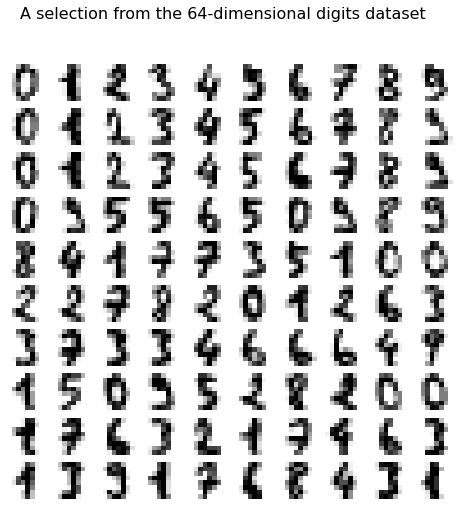

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(digits.images[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

# Train and Test

In [6]:
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

## Simple Neural Network:

In [7]:
model1 = keras.Sequential([
    keras.layers.Dense(32, input_shape=(64,), activation='tanh', kernel_regularizer=None), 
    keras.layers.Dense(10, activation='sigmoid')
])

model1.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Train on 1437 samples, validate on 360 samples
Epoch 1/50
1437/1437 [==============================] - 1s 501us/sample - loss: 2.0840 - accuracy: 0.2505 - val_loss: 1.8918 - val_accuracy: 0.4028
Epoch 2/50
1437/1437 [==============================] - 0s 63us/sample - loss: 1.7758 - accuracy: 0.5233 - val_loss: 1.6327 - val_accuracy: 0.6778
Epoch 3/50
1437/1437 [==============================] - 0s 101us/sample - loss: 1.5183 - accuracy: 0.7209 - val_loss: 1.3851 - val_accuracy: 0.7694
Epoch 4/50
1437/1437 [==============================] - 0s 94us/sample - loss: 1.2773 - accuracy: 0.8093 - val_loss: 1.1668 - val_accuracy: 0.8278
Epoch 5/50
1437/1437 [==============================] - 0s 94us/sample - loss: 1.0717 - accuracy: 0.8671 - val_loss: 0.9826 - val_accuracy: 0.8611
Epoch 6/50
1437/1437 [==============================] - 0s 92us/sample - loss: 0.8960 - accuracy: 0.8859 - val_loss: 0.8294 - val_accuracy: 0.8694
Epoch 7/50
1437/1437 [==============================] - 0s 74us/sampl

In [8]:
model1.evaluate(X_test, y_test)

360/360 [==============================] - 0s 31us/sample - loss: 0.0832 - accuracy: 0.9750


[0.08324853943453894, 0.975]

In [9]:
y_predicted = model1.predict(X_test)
y_predicted[0]

array([5.1911356e-05, 3.5315308e-05, 1.3021072e-07, 1.8016367e-04,
       1.4500173e-05, 1.5178682e-01, 8.5652317e-04, 9.5720964e-07,
       7.7017874e-04, 1.9052520e-04], dtype=float32)

In [10]:
np.argmax(y_predicted[0])

5

In [11]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1, 35,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 32,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 34]])>

Text(69.0, 0.5, 'Truth')

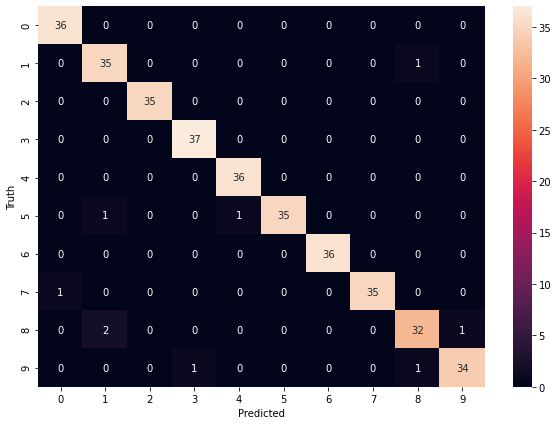

In [12]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Multilayer Neural Network:

In [141]:
import time
start_time = time.time()

model2 = tf.keras.Sequential([
    keras.layers.Dense(32, input_shape=(64,), activation='tanh', kernel_regularizer="l2"), # Hidden layer
#     keras.layers.Dense(10, activation='relu', kernel_regularizer=None), # Hidden layer
#     keras.layers.Dense(10, activation='relu', kernel_regularizer=None), # Hidden layer
#     keras.layers.Dense(10, activation='relu', kernel_regularizer=None), # Hidden layer
#     keras.layers.Dense(10, activation='relu', kernel_regularizer=None), # Hidden layer
#     keras.layers.Dense(10, activation='relu', kernel_regularizer=None), # Hidden layer
#     keras.layers.Dense(10, activation='relu', kernel_regularizer=None), # Hidden layer
#     keras.layers.Dense(10, activation='relu', kernel_regularizer=None), # Hidden layer
#     keras.layers.Dense(10, activation='relu', kernel_regularizer=None), # Hidden layer
    keras.layers.Dense(10, activation='softmax') # Output layer
])

# opt = tf.keras.optimizers.SGD(
#     learning_rate=0.01,
#     momentum=0.9,
#     nesterov=False,
#     name='SGD',
# #     **kwargs
# )

model2.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Train on 1437 samples, validate on 360 samples
Epoch 1/50
1437/1437 [==============================] - 0s 308us/sample - loss: 2.5093 - accuracy: 0.2582 - val_loss: 2.0432 - val_accuracy: 0.4944
Epoch 2/50
1437/1437 [==============================] - 0s 33us/sample - loss: 1.8605 - accuracy: 0.5484 - val_loss: 1.6428 - val_accuracy: 0.6722
Epoch 3/50
1437/1437 [==============================] - 0s 32us/sample - loss: 1.4934 - accuracy: 0.7244 - val_loss: 1.3320 - val_accuracy: 0.7417
Epoch 4/50
1437/1437 [==============================] - 0s 34us/sample - loss: 1.1948 - accuracy: 0.7996 - val_loss: 1.0610 - val_accuracy: 0.7944
Epoch 5/50
1437/1437 [==============================] - 0s 34us/sample - loss: 0.9389 - accuracy: 0.8532 - val_loss: 0.8479 - val_accuracy: 0.8583
Epoch 6/50
1437/1437 [==============================] - 0s 34us/sample - loss: 0.7533 - accuracy: 0.8859 - val_loss: 0.6854 - val_accuracy: 0.8806
Epoch 7/50
1437/1437 [==============================] - 0s 33us/sample

In [142]:
y_predicted = model2.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
# cm

In [143]:
y_predicted[0]

array([9.7362290e-04, 1.8698390e-04, 7.0933459e-07, 3.3540193e-03,
       1.8441279e-03, 9.7279185e-01, 4.3314714e-03, 1.1275317e-06,
       1.3643619e-02, 2.8724137e-03], dtype=float32)

Text(69.0, 0.5, 'Truth')

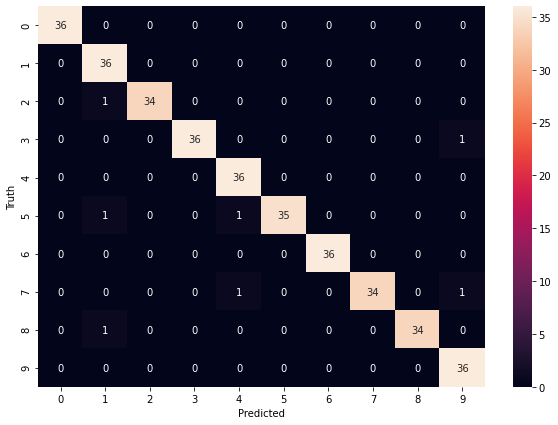

In [144]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

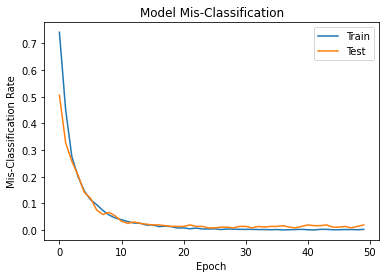

In [145]:
TrainError = np.ones(len(hist.history['accuracy'])) - np.array(hist.history['accuracy'])
TestError = np.ones(len(hist.history['val_accuracy'])) - np.array(hist.history['val_accuracy'])

plt.plot(TrainError)
plt.plot(TestError)
plt.title('Model Mis-Classification')
plt.ylabel('Mis-Classification Rate')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

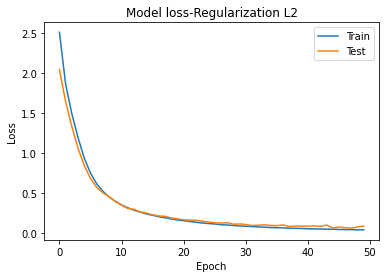

In [147]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss-Regularization L2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()